In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 100000

xs = np.random.uniform(-10,10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size=(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez("TF_intro", inputs = generated_inputs, targets = generated_targets)

## Solving with TensorFlow

In [3]:
training_data = np.load("TF_intro.npz")

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                         )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001)

model.compile(optimizer=custom_optimizer,loss="huber_loss")

model.fit(training_data["inputs"], training_data["targets"],epochs=100, verbose=2)

Epoch 1/100
3125/3125 - 2s - loss: 13.8843
Epoch 2/100
3125/3125 - 2s - loss: 7.7988
Epoch 3/100
3125/3125 - 2s - loss: 4.5310
Epoch 4/100
3125/3125 - 2s - loss: 3.9625
Epoch 5/100
3125/3125 - 2s - loss: 3.6470
Epoch 6/100
3125/3125 - 2s - loss: 3.3357
Epoch 7/100
3125/3125 - 2s - loss: 3.0248
Epoch 8/100
3125/3125 - 2s - loss: 2.7140
Epoch 9/100
3125/3125 - 2s - loss: 2.4034
Epoch 10/100
3125/3125 - 2s - loss: 2.0931
Epoch 11/100
3125/3125 - 2s - loss: 1.7830
Epoch 12/100
3125/3125 - 2s - loss: 1.4736
Epoch 13/100
3125/3125 - 2s - loss: 1.1696
Epoch 14/100
3125/3125 - 2s - loss: 0.8937
Epoch 15/100
3125/3125 - 2s - loss: 0.6669
Epoch 16/100
3125/3125 - 2s - loss: 0.4946
Epoch 17/100
3125/3125 - 2s - loss: 0.3727
Epoch 18/100
3125/3125 - 2s - loss: 0.2917
Epoch 19/100
3125/3125 - 2s - loss: 0.2404
Epoch 20/100
3125/3125 - 2s - loss: 0.2092
Epoch 21/100
3125/3125 - 2s - loss: 0.1908
Epoch 22/100
3125/3125 - 2s - loss: 0.1803
Epoch 23/100
3125/3125 - 2s - loss: 0.1743
Epoch 24/100
3125/3

## Extract weights and bias

In [5]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [6]:
print(weights)
print(bias)

[[ 2.001943]
 [-2.999615]]
[5.0007668]


## Extract the outputs (make predictions)

In [7]:
model.predict_on_batch(training_data["inputs"]).round(1)

array([[ 37.5],
       [ 46.8],
       [ 41.6],
       ...,
       [-19.2],
       [ 14.3],
       [ 11.9]], dtype=float32)

In [8]:
training_data["targets"].round(1)

array([[ 37.2],
       [ 46.1],
       [ 41.5],
       ...,
       [-19.1],
       [ 13.4],
       [ 11.7]])

## Plotting the data

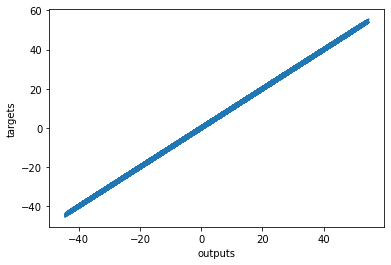

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data["targets"]))
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()